In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

In [2]:
# ------------------------------------------------------------------------------------------------------------
## Vamos a cargar los datos de Investigadores UTB...
# ------------------------------------------------------------------------------------------------------------
datautb=pd.read_excel("Base de Datos Scopus.xlsx")
datautb=datautb.rename(columns={"ID SCOPUS":"Autor ID"})
datautb["Autor ID"]=datautb["Autor ID"].astype("str")

In [3]:
# Generar query para Scopus: https://www.scopus.com/search/form.uri?display=advanced
search1,search2=[],[]
for j,i in enumerate(datautb["Autor ID"]):
    print("AU-ID ( {} )".format(i)+" OR ", end=' ')

AU-ID ( 57156565000 ) OR  AU-ID ( 14622047600 ) OR  AU-ID ( 24329839300 ) OR  AU-ID ( 57194034904 ) OR  AU-ID ( 57193533853 ) OR  AU-ID ( 24537991200 ) OR  AU-ID ( 36142156300 ) OR  AU-ID ( 57039103600 ) OR  AU-ID ( 56674579200 ) OR  AU-ID ( 57210822856 ) OR  AU-ID ( 57191333650 ) OR  AU-ID ( 7005142049 ) OR  AU-ID ( 57193012270 ) OR  AU-ID ( 55649334800 ) OR  AU-ID ( 26325154200 ) OR  AU-ID ( 55872162200 ) OR  AU-ID ( 35788581800 ) OR  AU-ID ( 57024211000 ) OR  AU-ID ( 56801043600 ) OR  AU-ID ( 56380539800 ) OR  AU-ID ( 57188841051 ) OR  AU-ID ( 57202285682 ) OR  AU-ID ( 57350116000 ) OR  AU-ID ( 58525252300 ) OR  AU-ID ( 57192930752 ) OR  AU-ID ( 57200615582 ) OR  AU-ID ( 58660078000 ) OR  AU-ID ( 57190688459 ) OR  AU-ID ( 57208719994 ) OR  AU-ID ( 55258973100 ) OR  AU-ID ( 57203321995 ) OR  AU-ID ( 57220927199 ) OR  AU-ID ( 57193252278 ) OR  AU-ID ( 57322375300 ) OR  AU-ID ( 57205400052 ) OR  AU-ID ( 57758796500 ) OR  AU-ID ( 56581610900 ) OR  AU-ID ( 57392556500 ) OR  AU-ID ( 56682

### Copiar y pegar 
el último statement y agregar a la linea siguiente. Esta será usada en el sitio de "Advance Search" de Scopus: https://www.scopus.com/search/form.uri?display=advanced...

(AF-ID ( 60103889 )) OR ( AU-ID ( 57156565000 ) OR  AU-ID ( 14622047600 ) OR  AU-ID ( 24329839300 ) OR  AU-ID ( 57194034904 ) OR  AU-ID ( 57193533853 ) OR  AU-ID ( 24537991200 ) OR  AU-ID ( 36142156300 ) OR  AU-ID ( 57039103600 ) OR  AU-ID ( 56674579200 ) OR  AU-ID ( 57210822856 ) OR  AU-ID ( 57191333650 ) OR  AU-ID ( 7005142049 ) OR  AU-ID ( 57193012270 ) OR  AU-ID ( 55649334800 ) OR  AU-ID ( 26325154200 ) OR  AU-ID ( 55872162200 ) OR  AU-ID ( 35788581800 ) OR  AU-ID ( 57024211000 ) OR  AU-ID ( 56801043600 ) OR  AU-ID ( 56380539800 ) OR  AU-ID ( 57188841051 ) OR  AU-ID ( 57202285682 ) OR  AU-ID ( 57350116000 ) OR  AU-ID ( 58525252300 ) OR  AU-ID ( 57192930752 ) OR  AU-ID ( 57200615582 ) OR  AU-ID ( 58660078000 ) OR  AU-ID ( 57190688459 ) OR  AU-ID ( 57208719994 ) OR  AU-ID ( 55258973100 ) OR  AU-ID ( 57203321995 ) OR  AU-ID ( 57220927199 ) OR  AU-ID ( 57193252278 ) OR  AU-ID ( 57322375300 ) OR  AU-ID ( 57205400052 ) OR  AU-ID ( 57758796500 ) OR  AU-ID ( 56581610900 ) OR  AU-ID ( 57392556500 ) OR  AU-ID ( 56682785300 ) OR  AU-ID ( 57219403758 ) OR  AU-ID ( 57197327858 ) OR  AU-ID ( 57196040759 ) OR  AU-ID ( 57220077867 ) OR  AU-ID ( 57750422100 ) OR  AU-ID ( 57223851529 ) OR  AU-ID ( 57189892062 ) OR  AU-ID ( 57205658483 ) OR  AU-ID ( 58068307100 ) OR  AU-ID ( 57197807415 ) OR  AU-ID ( 57918628600 ) OR  AU-ID ( 57222278899 ) OR  AU-ID ( 7195913974 ) OR  AU-ID ( 57218294431 ) OR  AU-ID ( 57206773929 ) OR  AU-ID ( 58068069000 ) OR  AU-ID ( 57216868622 ) OR  AU-ID ( 57930663300 ) OR  AU-ID ( 58523557700 ) OR  AU-ID ( 57204842254 ) OR  AU-ID ( 58618811100 ) OR  AU-ID ( 57201036449 ) OR  AU-ID ( 57209248085 ) OR  AU-ID ( 57212006168 ) OR  AU-ID ( 57427876200 ) OR  AU-ID ( 57204847841 ) OR  AU-ID ( 57195913859 ) OR  AU-ID ( 57218297655 ) OR  AU-ID ( 57222223605 ) OR  AU-ID ( 57221229836 ) OR  AU-ID ( 58803522300 ) OR  AU-ID ( 55783129400 ) OR  AU-ID ( 57903699900 ) OR  AU-ID ( 58954857900 ) OR  AU-ID ( 57202159706 ) OR  AU-ID ( 57219626251 ) OR  AU-ID ( 57215557867 ) OR  AU-ID ( 57219506381 ) OR  AU-ID ( 58134344400 ) OR  AU-ID ( 58917134900 ) OR  AU-ID ( 58153979500 ) OR  AU-ID ( 58868256900 ) OR  AU-ID ( 57918232800 ) OR  AU-ID ( 59987226300 ) )

### Copiar y pegar 
esta linea anterior en: https://www.scopus.com/search/form.uri?display=advanced, descargar el archivo que genera con los docmentos.

In [4]:
## ------------------------------------------------------------------------------------------------------------------------
## Cargando el archivo de datos de publicaciones Scopus descargado desde la página de Scopus
## ------------------------------------------------------------------------------------------------------------------------
scopus=pd.read_csv("scopus-2.csv")

In [5]:
scopus

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Document Type,Publication Stage,Open Access,Source,EID
0,Herrera-Acevedo D.D.; Sierra-Porta D.,"Herrera-Acevedo, D.D. (59278790000); Sierra-Po...",59278790000; 57191333650,Network structure and urban mobility sustainab...,2025,Sustainable Cities and Society,119,NaN,106076,NaN,NaN,NaN,3,10.1016/j.scs.2024.106076,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-85213079490
1,Geney E.R.; Vázquez-Miraz P.,"Geney, Elías Rafael (57427876200); Vázquez-Mir...",57427876200; 57196040759,Interpersonal values associated with unfaithfu...,2025,Revista de Psicologia (Peru),43,1,NaN,438,459,21.0,0,10.18800/psico.202501.015,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85212831235
2,Medina-Reyes M.F.; Fajardo-Cuadro J.G.; Martín...,"Medina-Reyes, María Fernanda (57221229836); Fa...",57221229836; 56581610900; 26325154200,DRIVING THE DEVELOPMENT OF ENERGY COMMUNITIES ...,2025,Habitat Sustentable,15,1,NaN,10,19,9.0,0,10.22320/07190700.2025.15.01.01,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-105010266217
3,Pérez-Morón J.M.; García Alonso R.; Thoene U.,"Pérez-Morón, James Manuel (57322375300); Garcí...",57322375300; 57215572817; 56766193900,Looking back to move forward: shedding light o...,2024,New England Journal of Entrepreneurship,27,2,NaN,152,172,20.0,7,10.1108/NEJE-10-2023-0088,https://www.scopus.com/inward/record.uri?eid=2...,Review,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85201694426
4,Hernandez-Fernandez J.; Herrera Zabala J.E.; M...,"Hernandez-Fernandez, Joaquin (57210432772); He...",57210432772; 59387631800; 36800050600,"Applied Investigation of Methyl, Ethyl, Propyl...",2024,Polymers,16,20,2851,NaN,NaN,NaN,2,10.3390/polym16202851,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85207660911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,Ortiz O.O.; Pasqualino J.; Castells F.,"Ortiz, O.O. (24436854200); Pasqualino, J. (146...",24436854200; 14622047600; 7003612213,Environmental assessment based on life cycle a...,2010,Afinidad,67,547,NaN,175,181,6.0,1,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-79953715946
1684,Romero L.A.; Millán M.S.; Pérez-Cabré E.,"Romero, Lenny A. (36142156300); Millán, María ...",36142156300; 7201466399; 8729551400,Optical implementation of multifocal programma...,2011,Journal of Physics: Conference Series,274,1,012050,NaN,NaN,NaN,4,10.1088/1742-6596/274/1/012050,https://www.scopus.com/inward/record.uri?eid=2...,Conference paper,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-79953739933
1685,Villa J.L.; Duque M.; Gauthier A.; Rakoto-Rava...,"Villa, J.L. (7005142049); Duque, M. (700486442...",7005142049; 7004864427; 7102084702; 6603389671,Supervision and optimal control of a class of ...,2003,IEEE International Conference on Emerging Tech...,2,January,1248693,177,180,3.0,5,10.1109/ETFA.2003.1248693,https://www.scopus.com/inward/record.uri?eid=2...,Conference paper,Final,NaN,Scopus,2-s2.0-79961012788
1686,Marrugo A.G.; Millán M.S.,"Marrugo, Andrés G. (24329839300); Millán, Marí...",24329839300; 7201466399,Optic disc segmentation in retinal images; [Se...,2010,Optica Pura y Aplicada,43,2,NaN,79,86,7.0,4,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-77954168286


In [6]:
## ------------------------------------------------------------------------------------------------------------------------
## Cargando el archivo de datos de publicaciones Scimago descargado desde la página de Scimago
## ------------------------------------------------------------------------------------------------------------------------
#scimago=pd.read_excel("scimagojr2024.xlsx")
scimago=pd.read_csv("scimagojr2024.csv",delimiter=";")

In [7]:
scimago

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2024),Total Docs. (3years),...,Ref. / Doc.,%Female,Overton,SDG,Country,Region,Publisher,Coverage,Categories,Areas
0,1,28773,Ca-A Cancer Journal for Clinicians,journal,"15424863, 00079235","145,004",Q1,223,43,122,...,"62,88",-,4,37,United States,Northern America,John Wiley and Sons Inc,1950-2025,Hematology (Q1); Oncology (Q1),Medicine
1,2,19434,MMWR Recommendations and Reports,journal,"10575987, 15458601","41,754",Q1,155,6,15,...,"275,33",-,1,5,United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2024,Epidemiology (Q1); Health Information Manageme...,Environmental Science; Health Professions; Med...
2,3,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","37,353",Q1,531,125,337,...,"92,45",-,0,15,United Kingdom,Western Europe,Nature Research,2000-2025,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology"
3,4,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","35,995",Q1,322,48,143,...,"69,79",-,35,27,United Kingdom,Western Europe,Oxford University Press,1886-2025,Economics and Econometrics (Q1),"Economics, Econometrics and Finance"
4,5,20425,Nature Reviews Drug Discovery,journal,"14741784, 14741776","30,506",Q1,412,247,718,...,"35,66",-,1,58,United Kingdom,Western Europe,Nature Research,2002-2025,Drug Discovery (Q1); Medicine (miscellaneous) ...,"Medicine; Pharmacology, Toxicology and Pharmac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31131,31132,145515,Waves in Random and Complex Media (discontinued),journal,"17455049, 17455030",NaN,-,54,308,1068,...,"49,05",-,0,20,United Kingdom,Western Europe,Taylor and Francis Ltd.,2005-2024,Engineering (miscellaneous); Physics and Astro...,Engineering; Physics and Astronomy
31132,31133,21101174249,Word and Music Studies,book series,15660958,NaN,-,8,16,21,...,"79,44",-,0,0,Netherlands,Western Europe,Brill: Rodopi,"1999-2001, 2004-2006, 2008, 2010-2011, 2014-20...",Arts and Humanities (miscellaneous); Literatur...,Arts and Humanities
31133,31134,18033,"World Dredging, Mining and Construction",trade journal,10450343,NaN,-,3,2,32,...,"0,00",-,0,1,United States,Northern America,Placer Management Corp.,"1979, 1988-2024",Building and Construction; Ocean Engineering; ...,Earth and Planetary Sciences; Engineering
31134,31135,21100898632,World Scientific-Now Publishers Series in Busi...,book series,22513442,NaN,-,3,9,22,...,"31,33",-,0,0,Singapore,Asiatic Region,World Scientific,"2018-2020, 2023-2024","Business, Management and Accounting (miscellan...","Business, Management and Accounting"


In [8]:
## ------------------------------------------------------------------------------------------------------------------------
## Este pedazo de script cruza ambos archivos anteriores (Scopus y Scimago) para añadir una columna en "Scopus"
## que se llama "Best Quartile" que corresponde a la publicación de cada una de las lineas de "Scopus"...
## ------------------------------------------------------------------------------------------------------------------------

best_quartile = []
for i in range(len(scopus)):
    journal = str(scopus.loc[i, "Source title"]).strip().lower()
    best = scimago.loc[scimago["Title"].str.strip().str.lower() == journal, "SJR Best Quartile"].values
    best_quartile.append(best[0] if len(best) == 1 else np.nan)

scopus["Best Quartile"] = best_quartile

#best_quartile=[]
#for i in range(len(scopus)):
#    journal=scopus["Source title"][i]
#    best=scimago.loc[scimago["Title"]==journal]["SJR Best Quartile"].values
#    if len(best)==1:
#        best_quartile.append(best[0])
#    else:
#        best_quartile.append(np.nan)
#    #print(journal,best)

#scopus["Best Quartile"]=best_quartile
scopus.head(1)

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Page count,Cited by,DOI,Link,Document Type,Publication Stage,Open Access,Source,EID,Best Quartile
0,Herrera-Acevedo D.D.; Sierra-Porta D.,"Herrera-Acevedo, D.D. (59278790000); Sierra-Po...",59278790000; 57191333650,Network structure and urban mobility sustainab...,2025,Sustainable Cities and Society,119,NaN,106076,NaN,...,NaN,3,10.1016/j.scs.2024.106076,https://www.scopus.com/inward/record.uri?eid=2...,Article,Final,NaN,Scopus,2-s2.0-85213079490,Q1


In [9]:
## ------------------------------------------------------------------------------------------------------------------------
## Este bloque de script genera un nuevo dataframe limpio que contiene todas las publicaciones con información de 
## tipo de publicación, curatil, etc....
## ------------------------------------------------------------------------------------------------------------------------

data_clean = scopus.copy()  # ← tabla final con cuartil
# --------------------------------------------------------------------
# 4. Explosión a nivel autor-artículo
#    (autor ID es muy fiable; si no está, usa nombre)
# --------------------------------------------------------------------
def explode_authors(row):
    ids   = str(row["Author(s) ID"]).split(";")
    names = str(row["Author full names"]).split(";")
    for aid, aname in zip(ids, names):
        aid = aid.strip()
        aname = aname.strip()
        if aid:
            yield {
                "author_id": aid,
                "author_name": aname,
                "year": int(row["Year"]),
                "citations": row.get("Cited by", np.nan),
                "publication": row.get("Title"),
                "journal": row.get("Source title"),
                "volume": row.get("Volume", np.nan),
                "issue": row.get("Issue", np.nan),
                "doi": row.get("DOI", np.nan),
                "document type": row.get("Document Type", np.nan),
                "quartile": row.get("Best Quartile", np.nan)
            }

author_rows = []
for _, r in data_clean.iterrows():
    author_rows.extend(list(explode_authors(r)))

auth_df = pd.DataFrame(author_rows)

In [10]:
auth_df

,author_id,author_name,year,citations,publication,journal,volume,issue,doi,document type,quartile
0,59278790000,"Herrera-Acevedo, D.D. (59278790000)",2025,3,Network structure and urban mobility sustainab...,Sustainable Cities and Society,119,NaN,10.1016/j.scs.2024.106076,Article,Q1
1,57191333650,"Sierra-Porta, D. (57191333650)",2025,3,Network structure and urban mobility sustainab...,Sustainable Cities and Society,119,NaN,10.1016/j.scs.2024.106076,Article,Q1
2,57427876200,"Geney, Elías Rafael (57427876200)",2025,0,Interpersonal values associated with unfaithfu...,Revista de Psicologia (Peru),43,1,10.18800/psico.202501.015,Article,Q3
3,57196040759,"Vázquez-Miraz, Pedro (57196040759)",2025,0,Interpersonal values associated with unfaithfu...,Revista de Psicologia (Peru),43,1,10.18800/psico.202501.015,Article,Q3
4,57221229836,"Medina-Reyes, María Fernanda (57221229836)",2025,0,DRIVING THE DEVELOPMENT OF ENERGY COMMUNITIES ...,Habitat Sustentable,15,1,10.22320/07190700.2025.15.01.01,Article,Q3
...,...,...,...,...,...,...,...,...,...,...,...
7315,24329839300,"Marrugo, Andrés G. (24329839300)",2010,4,Optic disc segmentation in retinal images; [Se...,Optica Pura y Aplicada,43,2,NaN,Article,Q4
7316,7201466399,"Millán, María S. (7201466399)",2010,4,Optic disc segmentation in retinal images; [Se...,Optica Pura y Aplicada,43,2,NaN,Article,Q4
7317,14622047600,"Pasqualino, Jorgelina C. (14622047600)",2006,155,Synergic effects of biodiesel in the biodegrad...,Biomass and Bioenergy,30,10,10.1016/j.biombioe.2006.03.002,Article,Q1
7318,55990834800,"Montané, Daniel (55990834800)",2006,155,Synergic effects of biodiesel in the biodegrad...,Biomass and Bioenergy,30,10,10.1016/j.biombioe.2006.03.002,Article,Q1


In [11]:
## ------------------------------------------------------------------------------------------------------------------------
## GET h-index-all and h5yr-index
## ------------------------------------------------------------------------------------------------------------------------

def h_index_from_citations(cites):
    """
    cites: iterable de enteros (citas por artículo)
    retorna: h-index (int)
    """
    # Limpieza básica
    vals = [max(0, int(x)) for x in cites if x == x]  # quita NaN y negativos
    vals.sort(reverse=True)
    # cuenta cuántos cumplen c >= i (con i=1..n) en orden descendente
    return sum(c >= i+1 for i, c in enumerate(vals))
    
def h_index_author(auth_df, author_id, min_year=None, max_year=None):
    sub = auth_df[auth_df["author_id"] == str(author_id)]
    if min_year is not None:
        sub = sub[sub["year"] >= min_year]
    if max_year is not None:
        sub = sub[sub["year"] <= max_year]
    return h_index_from_citations(sub["citations"])

In [12]:
# ------------------------------------------------------------------------------------------------------------
# Probando generación de h-index y h5yr-index
# ------------------------------------------------------------------------------------------------------------

# h-index total del autor
h_all = h_index_author(auth_df, "24329839300")
# h-index de los últimos 5 años (ajusta el rango que quieras)
import datetime
y = datetime.datetime.now().year
h_5yr = h_index_author(auth_df, "24329839300", min_year=y-5, max_year=y)
print(h_all, h_5yr)

13 10


In [13]:
q1_2025,q2_2025,q3_2025,q4_2025,sq_2025=[],[],[],[],[]
q1_2024,q2_2024,q3_2024,q4_2024,sq_2024=[],[],[],[],[]
q1_2023,q2_2023,q3_2023,q4_2023,sq_2023=[],[],[],[],[]
q1_2022,q2_2022,q3_2022,q4_2022,sq_2022=[],[],[],[],[]
h,h5,autor_sc,nameautor=[],[],[],[]
y = datetime.datetime.now().year
for i in auth_df["author_id"].unique():
    autor_sc.append(i)
    nameautor.append(auth_df[auth_df["author_id"]==i]["author_name"].unique()[0])
    h.append(h_index_author(auth_df, i))
    h5.append(h_index_author(auth_df, i, min_year=y-5, max_year=y))
    q1_2025.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2025)&(auth_df["quartile"]=="Q1")]))
    q2_2025.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2025)&(auth_df["quartile"]=="Q2")]))
    q3_2025.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2025)&(auth_df["quartile"]=="Q3")]))
    q4_2025.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2025)&(auth_df["quartile"]=="Q4")]))
    sq_2025.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2025)&\
        ((auth_df["quartile"]!="Q1")&(auth_df["quartile"]!="Q2")&(auth_df["quartile"]!="Q3")&(auth_df["quartile"]!="Q4"))]))
    q1_2024.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2024)&(auth_df["quartile"]=="Q1")]))
    q2_2024.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2024)&(auth_df["quartile"]=="Q2")]))
    q3_2024.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2024)&(auth_df["quartile"]=="Q3")]))
    q4_2024.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2024)&(auth_df["quartile"]=="Q4")]))
    sq_2024.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2024)&\
        ((auth_df["quartile"]!="Q1")&(auth_df["quartile"]!="Q2")&(auth_df["quartile"]!="Q3")&(auth_df["quartile"]!="Q4"))]))
    q1_2023.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2023)&(auth_df["quartile"]=="Q1")]))
    q2_2023.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2023)&(auth_df["quartile"]=="Q2")]))
    q3_2023.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2023)&(auth_df["quartile"]=="Q3")]))
    q4_2023.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2023)&(auth_df["quartile"]=="Q4")]))
    sq_2023.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2023)&\
        ((auth_df["quartile"]!="Q1")&(auth_df["quartile"]!="Q2")&(auth_df["quartile"]!="Q3")&(auth_df["quartile"]!="Q4"))]))
    q1_2022.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2022)&(auth_df["quartile"]=="Q1")]))
    q2_2022.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2022)&(auth_df["quartile"]=="Q2")]))
    q3_2022.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2022)&(auth_df["quartile"]=="Q3")]))
    q4_2022.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2022)&(auth_df["quartile"]=="Q4")]))
    sq_2022.append(len(auth_df[(auth_df["author_id"]==i)&(auth_df["year"]==2022)&\
        ((auth_df["quartile"]!="Q1")&(auth_df["quartile"]!="Q2")&(auth_df["quartile"]!="Q3")&(auth_df["quartile"]!="Q4"))]))

In [14]:
import datetime as dt
year_now=pd.Timestamp.now().year
summary_final=pd.DataFrame({"Autor ID":autor_sc,"Autor Name":nameautor,
                            "H-index":h,"H5yr-index":h5,
                            "Q1_2025":q1_2025,"Q2_2025":q2_2025,"Q3_2025":q3_2025,"Q4_2025":q4_2025,"SQ_2025":sq_2025,
                            "Q1_2024":q1_2024,"Q2_2024":q2_2024,"Q3_2024":q3_2024,"Q4_2024":q4_2024,"SQ_2024":sq_2024,
                            "Q1_2023":q1_2023,"Q2_2023":q2_2023,"Q3_2023":q3_2023,"Q4_2023":q4_2023,"SQ_2023":sq_2023,
                            "Q1_2022":q1_2022,"Q2_2022":q2_2022,"Q3_2022":q3_2022,"Q4_2022":q4_2022,"SQ_2022":sq_2022})

In [15]:
summary_final.sort_values(by="H-index",ascending=False).head(2)

,Autor ID,Autor Name,H-index,H5yr-index,Q1_2025,Q2_2025,Q3_2025,Q4_2025,SQ_2025,Q1_2024,...,Q1_2023,Q2_2023,Q3_2023,Q4_2023,SQ_2023,Q1_2022,Q2_2022,Q3_2022,Q4_2022,SQ_2022
565,56919564100,"Montoya, Oscar Danilo (56919564100)",32,28,0,0,0,0,0,1,...,13,6,0,0,3,22,30,3,1,1
863,57191493648,"Gil-González, Walter (57191493648)",27,20,0,0,0,0,0,0,...,3,1,0,0,2,6,5,0,1,0


In [16]:
datautb.set_index("Autor ID",inplace=True)
summary_final.set_index("Autor ID",inplace=True)
summary_final["Total 2025"]=summary_final[["Q1_2025","Q2_2025","Q3_2025","Q4_2025"]].sum(axis=1)
summary_final["Total 2025 (include SQ)"]=summary_final[["Q1_2025","Q2_2025","Q3_2025","Q4_2025","SQ_2025"]].sum(axis=1)
summary_final["Total 2024"]=summary_final[["Q1_2024","Q2_2024","Q3_2024","Q4_2024"]].sum(axis=1)
summary_final["Total 2024 (include SQ)"]=summary_final[["Q1_2024","Q2_2024","Q3_2024","Q4_2024","SQ_2024"]].sum(axis=1)
summary_final["Total 2023"]=summary_final[["Q1_2023","Q2_2023","Q3_2023","Q4_2023"]].sum(axis=1)
summary_final["Total 2023 (include SQ)"]=summary_final[["Q1_2023","Q2_2023","Q3_2023","Q4_2023","SQ_2023"]].sum(axis=1)
summary_final["Total 2022"]=summary_final[["Q1_2022","Q2_2022","Q3_2022","Q4_2022"]].sum(axis=1)
summary_final["Total 2022 (include SQ)"]=summary_final[["Q1_2022","Q2_2022","Q3_2022","Q4_2022","SQ_2022"]].sum(axis=1)

In [17]:
data1=datautb.merge(summary_final,left_index=True, right_index=True)\
    .sort_values(by=["H-index"],ascending=False)
data1.to_excel("MidataMiScript.xlsx")
data1

,CODIGO,DOCENTE,ESCUELA,NAME SCOPUS,SCOPUS,Autor Name,H-index,H5yr-index,Q1_2025,Q2_2025,...,Q4_2022,SQ_2022,Total 2025,Total 2025 (include SQ),Total 2024,Total 2024 (include SQ),Total 2023,Total 2023 (include SQ),Total 2022,Total 2022 (include SQ)
Autor ID,,,,,,,,,,,,,,,,,,,,,
57156565000,T00076376,YADY TATIANA SOLANO CORREA,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Solano-Correa, Yady Tatiana",https://www.scopus.com/authid/detail.uri?autho...,"Solano-Correa, Yady Tatiana (57156565000)",14,8,1,0,...,0,0,1,2,2,16,4,10,5,5
24329839300,T00013767,ANDRES GUILLERMO MARRUGO HERNANDEZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Marrugo, Andrés G.",https://www.scopus.com/authid/detail.uri?autho...,"Marrugo, Andres G. (24329839300)",13,10,1,0,...,4,2,1,1,7,18,5,14,6,8
14622047600,T00057322,JORGELINA CECILIA PASQUALINO,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Pasqualino, Jorgelina C.",https://www.scopus.com/authid/detail.uri?autho...,"Pasqualino, Jorgelina (14622047600)",13,2,0,0,...,1,0,0,0,0,1,1,3,2,2
57194034904,T00014261,HOLMAN OSPINA MATEUS,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Ospina-Mateus, Holman",https://www.scopus.com/authid/detail.uri?autho...,"Ospina-Mateus, Holman (57194034904)",12,11,0,0,...,0,1,0,0,2,5,4,6,2,3
36142156300,T00000080,LENNY ALEXANDRA ROMERO PEREZ,CIENCIAS BÁSICAS,"Romero, Lenny A.",https://www.scopus.com/authid/detail.uri?autho...,"Romero, Lenny A. (36142156300)",11,9,0,0,...,0,2,0,0,6,10,2,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57215557867,T00057454,CARLOS HUMBERTO GUALDRON GARCIA,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Gualdrón, Carlos",https://www.scopus.com/authid/detail.uri?autho...,"Gualdron, Carlos (57215557867)",0,0,0,0,...,0,3,0,0,0,3,0,1,0,3
58917134900,T00035572,JEFFERSON ANDRES PIEDRAHITA GONZALEZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Piedrahita, Jefferson Marulanda",https://www.scopus.com/authid/detail.uri?autho...,"Piedrahita, Jefferson (58917134900)",0,0,0,1,...,0,0,1,1,0,0,1,1,0,0
58153979500,T00000062,LUIS CARLOS ARRAUT CAMARGO,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Arraut, Luis Carlos",https://scopus.utb.elogim.com/authid/detail.ur...,"Arraut, Luis (58153979500)",0,0,0,0,...,0,6,0,0,0,0,0,0,0,6


In [18]:
auth_df=auth_df.rename(columns={"author_id":"Autor ID"})
auth_df.set_index("Autor ID",inplace=True)

In [19]:
data2=datautb.merge(auth_df,left_index=True, right_index=True)\
    .sort_values(by=["year"],ascending=False)
data2.to_excel("MidataMiScript2.xlsx")
data2

,CODIGO,DOCENTE,ESCUELA,NAME SCOPUS,SCOPUS,author_name,year,citations,publication,journal,volume,issue,doi,document type,quartile
Autor ID,,,,,,,,,,,,,,,
59987226300,T00026962,STEFANIA ARIAS CIFUENTES,CENTRO DE IDIOMAS,"Arias-Cifuentes, Stefania",https://www.scopus.com/authid/detail.uri?autho...,"Arias-Cifuentes, Stefania (59987226300)",2025,0,Assessing the Impact of Language Virtual Excha...,Ikala,30,2,10.17533/udea.ikala.355699,Article,Q1
57192930752,T00019649,KAROL PATRICIA GUTIERREZ RUIZ,"ESCUELA DE NEGOCIOS, LEYES Y SOCIEDAD","Gutiérrez-Ruiz, Karol Patricia",https://www.scopus.com/authid/detail.uri?autho...,"Gutiérrez-Ruiz, Karol (57192930752)",2025,0,Work Motivation in the Millennial Era: Explori...,Psychological Thought,18,1,10.37708/psyct.v18i1.929,Article,Q4
35788581800,T00090440,CESAR AUGUSTO VILORIA NUÑEZ,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Viloria-Nuñez, Cesar",https://www.scopus.com/authid/detail.uri?autho...,"Viloria-Nunez, Cesar (35788581800)",2025,0,"Business Performance, Social Networks, and Wor...",IEEE Engineering Management Review,NaN,NaN,10.1109/EMR.2025.3575426,Article,Q2
35788581800,T00090440,CESAR AUGUSTO VILORIA NUÑEZ,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Viloria-Nuñez, Cesar",https://www.scopus.com/authid/detail.uri?autho...,"Viloria-Nunez, Cesar (35788581800)",2025,0,Predicting Atmospheric Dispersion of Industria...,IEEE Access,13,NaN,10.1109/ACCESS.2025.3551259,Article,Q1
57024211000,T00057415,DEYLER RAFAEL CASTILLA CABALLERO,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Castilla-Caballero, Deyler",https://www.scopus.com/authid/detail.uri?autho...,"Castilla-Caballero, Deyler (57024211000)",2025,0,Use of a 416B-type central-hybrid experimental...,Applied Catalysis A: General,697,NaN,10.1016/j.apcata.2025.120196,Article,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005142049,T00000068,JOSE LUIS VILLA RAMIREZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Villa, J. L.",https://scopus.utb.elogim.com/authid/detail.ur...,"Villa, J.L. (7005142049)",2003,1,Supervisory Control Oriented Modeling of an Ex...,IEEE International Symposium on Intelligent Co...,NaN,NaN,10.1109/isic.2003.1254666,Conference paper,NaN
7005142049,T00000068,JOSE LUIS VILLA RAMIREZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Villa, J. L.",https://scopus.utb.elogim.com/authid/detail.ur...,"Villa, J.L. (7005142049)",2003,4,Modeling and control of a water treatment plant,Proceedings of the IEEE International Conferen...,1,NaN,NaN,Conference paper,NaN
7005142049,T00000068,JOSE LUIS VILLA RAMIREZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Villa, J. L.",https://scopus.utb.elogim.com/authid/detail.ur...,"Villa, J.L. (7005142049)",2003,0,Modeling and simulation of an experimental man...,Lecture Notes in Computer Science (including s...,2667,NaN,10.1007/3-540-44839-x_57,Article,Q2


In [20]:
data1.sort_values(by="Total 2025", ascending=False).head(15)

,CODIGO,DOCENTE,ESCUELA,NAME SCOPUS,SCOPUS,Autor Name,H-index,H5yr-index,Q1_2025,Q2_2025,...,Q4_2022,SQ_2022,Total 2025,Total 2025 (include SQ),Total 2024,Total 2024 (include SQ),Total 2023,Total 2023 (include SQ),Total 2022,Total 2022 (include SQ)
Autor ID,,,,,,,,,,,,,,,,,,,,,
57191333650,T00069449,DAVID SIERRA PORTA,ESCUELA DE TRANSFORMACIÓN DIGITAL,Sierra-Porta D.,https://www.scopus.com/authid/detail.uri?autho...,"Sierra-Porta, D. (57191333650)",8,8,4,2,...,0,1,6,6,5,8,6,6,3,4
57192930752,T00019649,KAROL PATRICIA GUTIERREZ RUIZ,"ESCUELA DE NEGOCIOS, LEYES Y SOCIEDAD","Gutiérrez-Ruiz, Karol Patricia",https://www.scopus.com/authid/detail.uri?autho...,"Gutiérrez-Ruiz, K. (57192930752)",4,2,2,0,...,2,1,4,4,1,1,1,1,4,5
55258973100,T00059175,CLAUDIA PATRICIA DIAZ MENDOZA,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Díaz-Mendoza, Claudia",https://www.scopus.com/authid/detail.uri?autho...,"Díaz-Mendoza, Claudia (55258973100)",3,2,3,1,...,1,0,4,4,1,2,1,2,1,1
26325154200,T00000254,JUAN CARLOS MARTINEZ SANTOS,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Martínez, Juan Carlos",https://www.scopus.com/authid/detail.uri?autho...,"Martínez-Santos, Juan Carlos (26325154200)",6,5,1,1,...,1,3,4,4,3,15,3,15,1,4
57202285682,T00008436,EDWIN ALEXANDER PUERTAS DEL CASTILLO,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Puertas, Edwin",https://www.scopus.com/authid/detail.uri?autho...,"Puertas, Edwin (57202285682)",4,4,1,2,...,0,2,4,4,3,15,3,13,1,3
57210822856,T00000243,SONIA HELENA CONTRERAS ORTIZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Contreras-Ortiz, Sonia H.",https://www.scopus.com/authid/detail.uri?autho...,"Contreras-Ortiz, S.H. (57210822856)",9,6,0,0,...,1,2,3,4,0,8,1,7,3,5
57350116000,T00055760,JEOVANNY DE JESUS MUENTES ACEVEDO,CIENCIAS BÁSICAS,"Acevedo, Jeovanny Muentes",https://www.scopus.com/authid/detail.uri?autho...,"Muentes, J. (57350116000)",4,2,1,0,...,0,0,2,2,2,2,1,1,2,2
35788581800,T00090440,CESAR AUGUSTO VILORIA NUÑEZ,ESCUELA DE TRANSFORMACIÓN DIGITAL,"Viloria-Nuñez, Cesar",https://www.scopus.com/authid/detail.uri?autho...,"Viloria-Nuñez, Cesar (35788581800)",6,5,1,1,...,0,4,2,3,3,14,4,8,0,4
7005142049,T00000068,JOSE LUIS VILLA RAMIREZ,"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO","Villa, J. L.",https://scopus.utb.elogim.com/authid/detail.ur...,"Villa, J.L. (7005142049)",8,4,0,0,...,1,4,2,2,0,5,4,9,1,5


In [21]:
print("DOne...! Archivos generados...!")

DOne...! Archivos generados...!


Plots...

In [22]:
dat_ETD=data1[(data1["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data1["Total 2025 (include SQ)"]>0)]

In [112]:
cmap = plt.get_cmap('Blues_r')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]

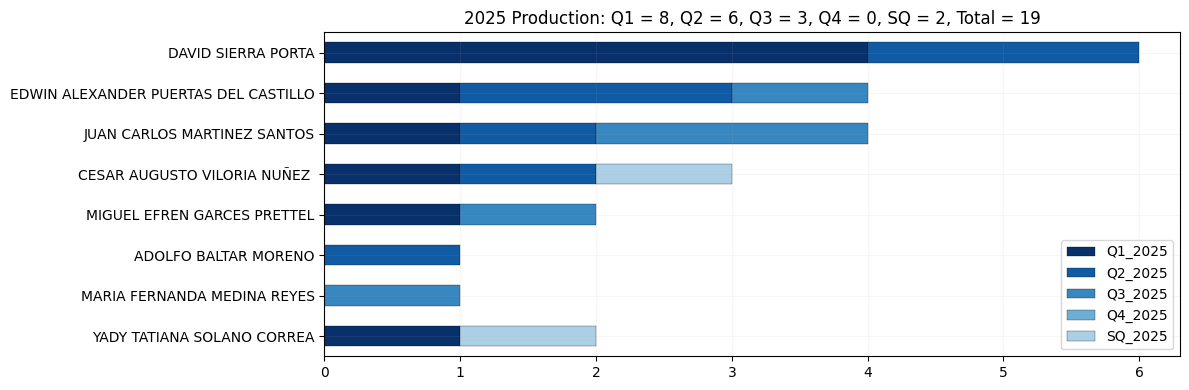

In [120]:
dat_ETD.set_index("DOCENTE")\
    .sort_values(by="Total 2025",ascending=True)[["Q1_2025","Q2_2025","Q3_2025","Q4_2025","SQ_2025"]]\
    .plot.barh(stacked=True, figsize=(12, 4), color=colors, edgecolor='k', lw=0.2)
plt.grid(alpha=0.1); plt.ylabel(None)
plt.title("2025 Production: Q1 = {}, Q2 = {}, Q3 = {}, Q4 = {}, SQ = {}, Total = {}".format(
    len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data2["quartile"]=="Q1")&(data2["year"]==2025)].drop_duplicates(subset="publication")),
          len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data2["quartile"]=="Q2")&(data2["year"]==2025)].drop_duplicates(subset="publication")),
len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data2["quartile"]=="Q3")&(data2["year"]==2025)].drop_duplicates(subset="publication")),
len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data2["quartile"]=="Q4")&(data2["year"]==2025)].drop_duplicates(subset="publication")),
len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&((data2["quartile"]=="-")|(data2["quartile"].isna()))&(data2["year"]==2025)].drop_duplicates(subset="publication")),
         len(data2[(data2["ESCUELA"]=="ESCUELA DE TRANSFORMACIÓN DIGITAL")&(data2["year"]==2025)].drop_duplicates(subset="publication"))))
plt.tight_layout()
plt.savefig("ETD1.png",dpi=300,bbox_inches='tight')

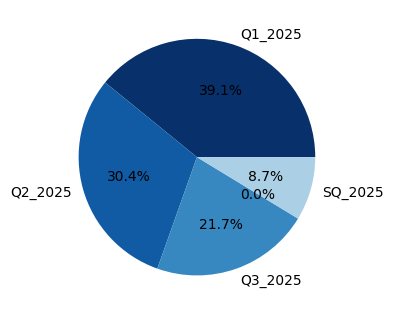

In [114]:
dat_ETD[["Q1_2025","Q2_2025","Q3_2025","Q4_2025","SQ_2025"]].T.sum(axis=1).plot.pie(autopct='%1.1f%%', 
                                                                                    figsize=(4,4), 
                                                                                    explode=(0.,0.0,0.0,0.0,0.),
                                                                                   colors=colors,
                                                                                   shadow=False)
plt.tight_layout()
plt.savefig("ETD2.png",dpi=300,bbox_inches='tight')
plt.show()

In [115]:
summ2=pd.crosstab(data2[data2["year"]==2025].drop_duplicates(subset="publication")[["quartile","ESCUELA"]].reset_index()["ESCUELA"],
                       data2[data2["year"]==2025].drop_duplicates(subset="publication")[["quartile","ESCUELA"]].reset_index()["quartile"])

In [116]:
summ2.index.name=""

In [117]:
summ2

quartile,-,Q1,Q2,Q3,Q4
,,,,,
CENTRO DE IDIOMAS,0,1,0,0,0
CIENCIAS BÁSICAS,0,3,1,1,0
"ESCUELA DE INGENIERÍA, ARQUITECTURA Y DISEÑO",1,8,3,2,4
"ESCUELA DE NEGOCIOS, LEYES Y SOCIEDAD",0,2,3,3,1
ESCUELA DE TRANSFORMACIÓN DIGITAL,1,8,6,2,0


<Axes: xlabel='quartile'>

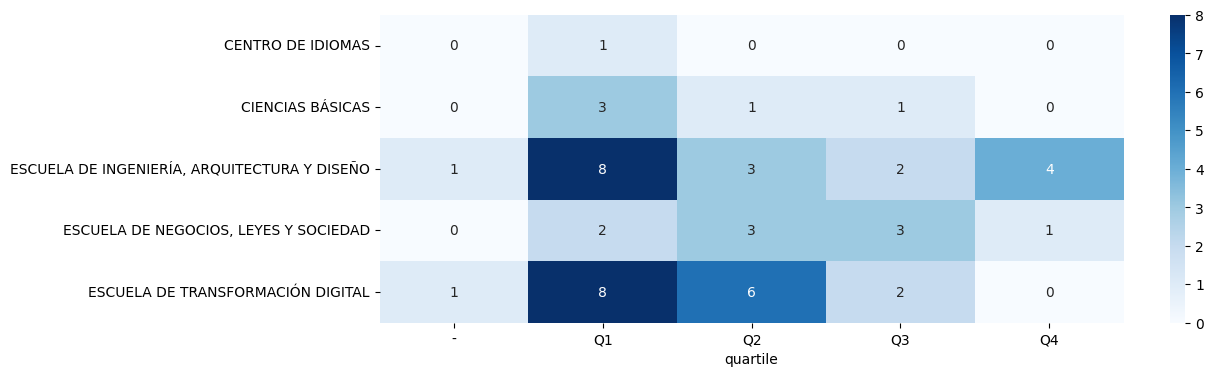

In [121]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.heatmap(summ2,cmap="Blues",annot=True)
plt.tight_layout()
